In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
#read the deforestation CSV file into a dataframe
df = pd.read_csv('deforestation_household_1km_buffer.csv')


In [4]:
#Aggregate the household deforestation by year
deforest = df.groupby('year').sum('deforstation_area_km_squared')
deforest = deforest.drop(deforest.index[0:14])

In [180]:
deforest.head(6)

,HHID,FID,deforestation_area_km_squared
year,,,
2015,512439449258,1015669,9.9369
2016,512439449258,1015669,18.8307
2017,512439449258,1015669,24.7977
2018,512439449258,1015669,14.4621
2019,512439449258,1015669,16.8525


Text(0, 0.5, 'Deforestation Area, km²')

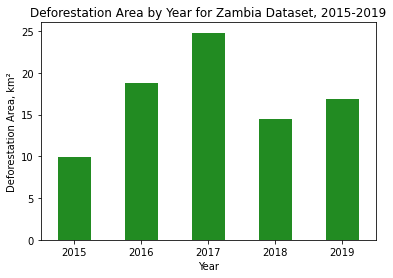

In [11]:
#I had an error when I tried to use year so that is why I had to code it this way
#Create bar chart of the deforestation area for the dataset
ax=deforest.plot.bar(x='HHID',y='deforestation_area_km_squared', legend=False, title='Deforestation Area by Year for Zambia Dataset, 2015-2019', color='forestgreen')
ax.set_xticklabels([2015, 2016, 2017, 2018, 2019], rotation=0)
ax.set_xlabel("Year")
ax.set_ylabel("Deforestation Area, km²")


In [12]:
#Read in the rainfall and temperature data

df_rain = pd.read_csv('Rainfall Data.csv')
df_temp = pd.read_csv('Temperature data.csv')

In [13]:
#Aggreate household rainfall by year 
df_rain = df_rain.groupby('year').sum('total rain')
df_rain.head()

#I had problems when using the year so I had to do this
year = [2015, 2016, 2017, 2018, 2019]
df_rain['Year'] = year



In [14]:
#Find average temperature for each year
df_temp = df_temp.groupby('year').mean('temperature')
df_temp.head()

#Again I had problems with the year so I had to do this
year = [2015, 2016, 2017, 2018, 2019]
df_temp['Year'] = year

In [15]:
#Combine data into one dataframe so I can plot it
df_combined = df_rain.merge(df_temp, on='Year')
df_combined.head()

,HHID_x,totalrain,Year,HHID_y,temperature
0,5.179363e+11,1.228870e+06,2015,3.774599e+07,34.672565
1,5.179363e+11,1.365846e+06,2016,3.774599e+07,35.207972
2,5.179363e+11,1.711534e+06,2017,3.774599e+07,33.466137
3,5.179363e+11,1.352758e+06,2018,3.774599e+07,34.317042
4,5.179363e+11,1.146859e+06,2019,3.774599e+07,35.397848


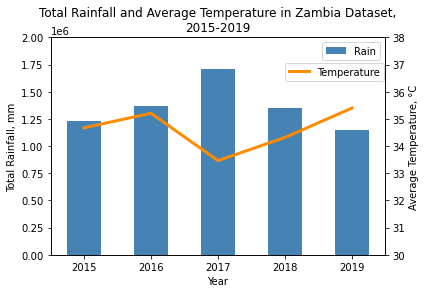

In [16]:
from textwrap import wrap
from matplotlib.pyplot import figure
import matplotlib as mpl


#Put a bar chart of rainfall and line chart of temperature on the same plot
ax=df_combined[['totalrain']].plot(kind='bar', xlabel='Year', ylabel='Total Rainfall, mm', color='steelblue')
plt.ylim(0,2000000)
ax.legend(['Rain'])

ax=df_combined['temperature'].plot(secondary_y=True, color='darkorange', linewidth=3)
plt.ylim(30,38)

ax.set_xticklabels([2015, 2016, 2017, 2018, 2019])
ax.set_ylabel("Average Temperature, °C")

#I had some problems with the title overlapping the scientific notation symbol so I had to do this
title = ax.set_title("\n".join(wrap("Total Rainfall and Average Temperature in Zambia Dataset, 2015-2019", 60)))

title.set_y(1.05)

ax.legend(['Temperature'], loc=(0.7,0.8))

plt.savefig('Rainandtemp.png')

#Some things I tried before that didn't work
#df_combined.plot(use_index=True,x='Year',y='temperature',secondary_y=True, ax=ax, color='orange')
#df_combined.plot(use_index=True, x='Year',y='totalrain',kind='bar', ax=ax)


#ax=df_rain.plot.bar(x='HHID',y='totalrain', legend=False, title='Rainfall and Temperature for Zambia Dataset, 2015-2019', color='deepskyblue')
#ax.set_xticklabels([2015, 2016, 2017, 2018, 2019])
#ax.set_xlabel("Year")

#ax=df_temp.plot(x='Year', y='temperature',secondary_y=True)
